# MunichAdjustment Correlation

In [1]:
import chainladder as cl
import pandas as pd
import numpy as np

This example demonstrates how to recreate the the residual correlation plots
of the Munich Chainladder paper.


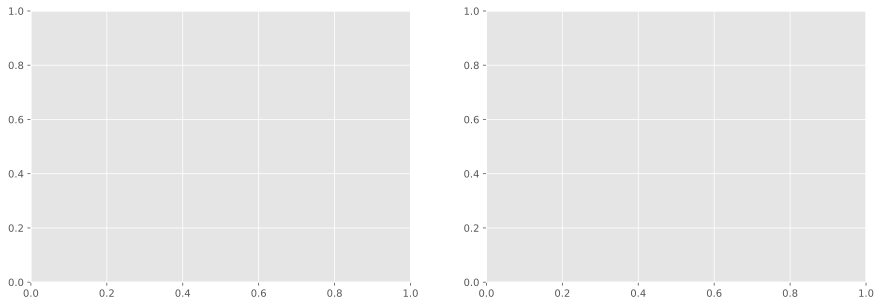

In [7]:
# Fit Munich Model
mcl = cl.load_sample('mcl')
model = cl.MunichAdjustment([('paid', 'incurred')]).fit(mcl)

# Paid lambda line
paid_lambda = pd.DataFrame(
    {'(P/I)': np.linspace(-2,2,2),
     'P': np.linspace(-2,2,2)*model.lambda_.loc['paid']})

# Paid scatter
paid_plot = pd.concat(
    (model.resids_['paid'].melt(value_name='P')['P'],
     model.q_resids_['paid'].melt(value_name='(P/I)')['(P/I)']),
    axis=1)

# Incurred lambda line
inc_lambda = pd.DataFrame(
    {'(I/P)': np.linspace(-2,2,2),
     'I': np.linspace(-2,2,2)*model.lambda_.loc['incurred']})

# Incurred scatter
incurred_plot = pd.concat(
    (model.resids_['incurred'].melt(value_name='I')['I'],
     model.q_resids_['incurred'].melt(value_name='(I/P)')['(I/P)']),
    axis=1)

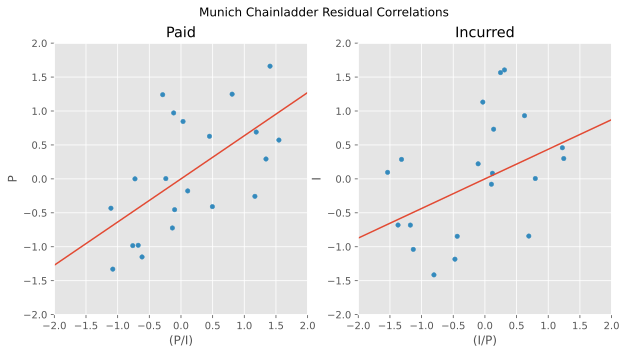

In [9]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%config InlineBackend.figure_format = 'svg'

# Plot Data
fig, ((ax0, ax1)) = plt.subplots(ncols=2, figsize=(10,5))

paid_lambda.plot(x='(P/I)', y='P', legend=False, ax=ax0)
paid_plot.plot(
    kind='scatter', y='P', x='(P/I)', ax=ax0,
    xlim=(-2,2), ylim=(-2,2), title='Paid')

inc_lambda.plot(x='(I/P)', y='I', ax=ax1, legend=False);
incurred_plot.plot(
        kind='scatter', y='I', x='(I/P)', ax=ax1,
        xlim=(-2,2), ylim=(-2,2), title='Incurred');
fig.suptitle("Munich Chainladder Residual Correlations");

In [10]:
from myst_nb import glue
glue("plot_munich_resid", fig, display=False)